**Predicting Salary using Experience and Linear Regression model**

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

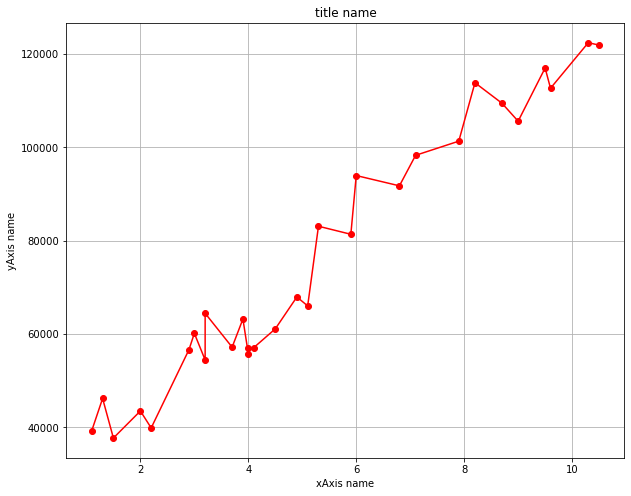

In [6]:
plt.figure(figsize=(10,8))
plt.plot(df.YearsExperience,df.Salary,color='red', marker='o')
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.grid(True)
plt.show()

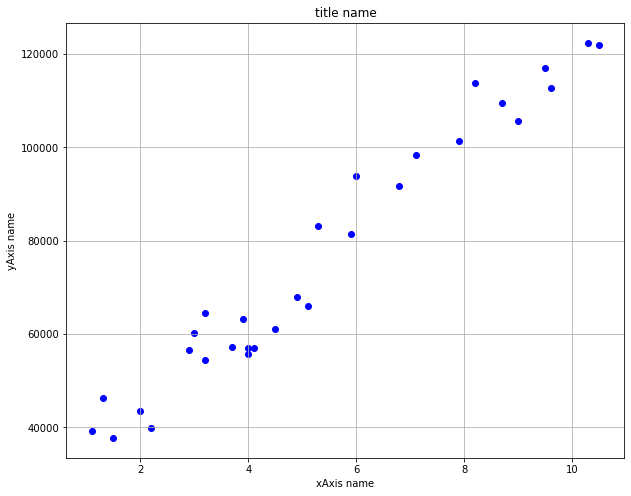

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(df.YearsExperience,df.Salary,color ="blue")
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.grid(True)
plt.show()

In [8]:
##Train Test split
from sklearn.model_selection import train_test_split
X = df['YearsExperience'] # Independet variable
y = df['Salary'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [9]:
X_train = X_train[:,np.newaxis]  #If it one dimensional array
X_test = X_test[:,np.newaxis]

In [10]:
len(X_train),len(X_test)

(21, 9)

In [11]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# LR model
lm = LinearRegression() #lm = LinearRegression(fit_intercept=True)#
lm.fit(X_train,y_train) #Fitting model
print(lm.score(X_train,y_train)) # Score is accuracy in which 1 is accurate

0.960775692121653


In [12]:
# Y=mX + b 
# m is coef
# b is intercept
print(lm.coef_)
print(lm.intercept_)

[9202.23359825]
26049.577715443353


<AxesSubplot:ylabel='Salary'>

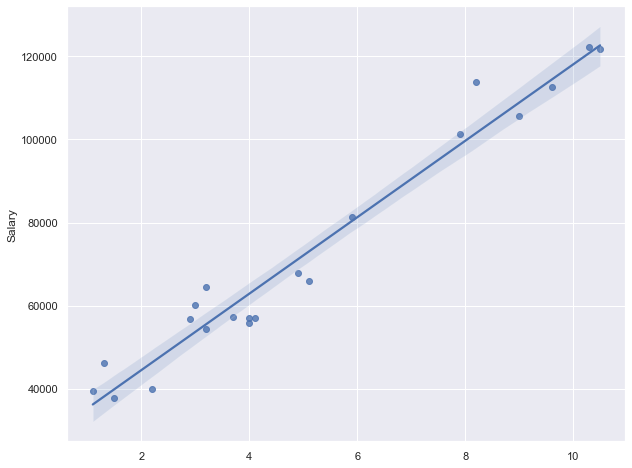

In [13]:
sns.set(rc={"figure.figsize":(10, 8)})
sns.regplot(X_train,y_train)

In [14]:
# Predicting the Salary for the Test values
y_pred = lm.predict(X_test)

<AxesSubplot:>

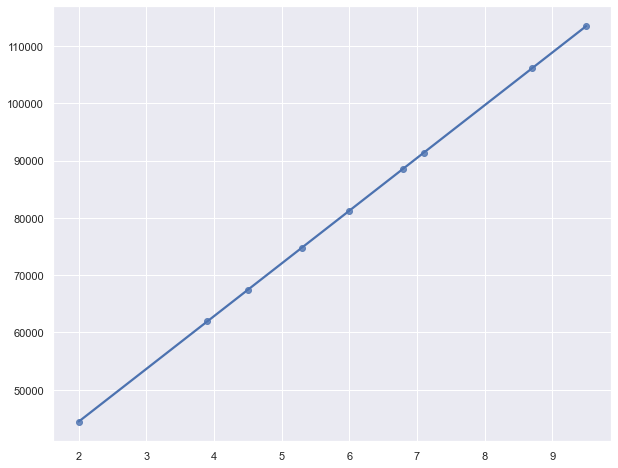

In [15]:
sns.set(rc={"figure.figsize":(10, 8)})
sns.regplot(X_test,y_pred)

In [16]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)
# Calculate R square vale
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 39139215.99958858
r square : 0.9248580247217075


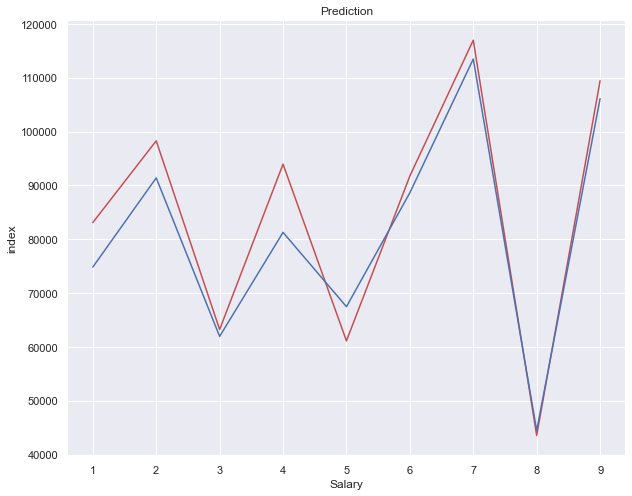

In [17]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

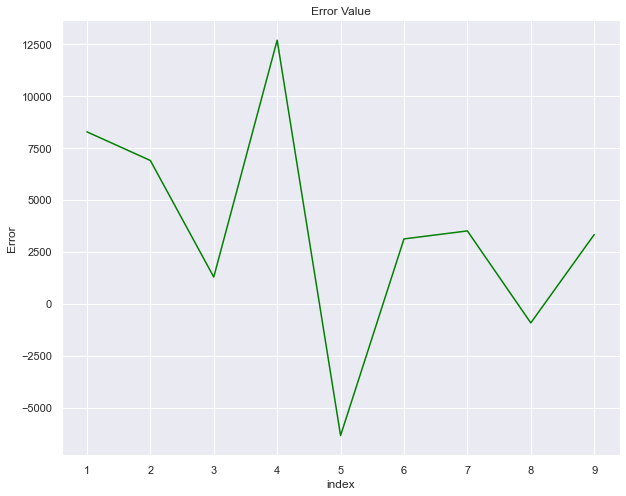

In [18]:
# plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [19]:
df[14:15] # To see the data in row
test_pass = np.array([3]).reshape(1,-1)     ## Change YearsExperience which is 3

print(lm.predict(test_pass)) #Predict Salary

[53656.27851021]
